In [207]:
import string
import os
from os.path import join as pjoin
from os.path import abspath as abspath

In [208]:
print('aaa' + 'asdfds' + string.whitespace[3] + 'bbb')
# what!?

bbb


In [209]:
S = 'self.'
S2 = ['self','.']
a = 90
b = a+10

In [243]:
class Line :
    def __init__(self, s) :
        self.text = s
        self.tabs = Line.count_tabs(s)
        self.text_terms = s.split()
#         self.list_terms = []
#         for term in self.text_terms :
#             self.list_terms.append(term.split)
        
    def find_self(self) :
        pass
        
    @staticmethod
    def count_tabs(s) :
        count = 0 
        #change later to count indentation and not just 4 spaces
        while s.startswith('    ') :
            s = s[4:]
            count += 1
        return count
    
    @staticmethod
    def split_series(txt_list, split_chars) :
        for split_char in split_chars :
            new_txt_list = []
            for i in range(len(txt_list)) :
                new_txt_list.extend(txt_list[i].split(split_char))
            txt_list = new_txt_list
        return txt_list
    
    @staticmethod
    def separate_series(txt_list) :
        
        punc = string.punctuation
        punc = punc.replace('_','')
        for char in punc :
            new_txt_list = []
            for txt in txt_list :
                temp = Line.separate(txt,char)
                new_txt_list.extend(temp)
            txt_list = new_txt_list
        return txt_list
    
    @staticmethod
    def separate(txt, char, count=1) :
        if len(txt) < 2 :
            return ([txt])
        ind = txt.find(char)
        if ind != -1 :
      
            txt_list = [txt[:ind], txt[ind]]
            txt_list.extend(Line.separate(txt[ind+1:],char,count=count+1))
        else :
            txt_list = [txt]
        return txt_list
    
    @staticmethod
    def pattern_in_list(some_list, pattern) :
        split_char_orig = ','
        split_char = split_char_orig
        #char_in_list = True
        #while split_char in some_list :
        while Line.str_in_list(some_list, split_char) :
            split_char = split_char + split_char_orig

        str_list = ''
        for element in some_list :
            str_list += str(element) + split_char

        str_pattern = ''
        for element in pattern :
            str_pattern += str(element) + split_char

        str_index = str_list.find(str_pattern)
        if str_index != -1 :
            index = str_list[:str_index].count(split_char)
            return index
        else :
            return -1   
        
    @staticmethod
    def str_in_list(some_list, s) :
        for element in some_list :
            if s in element :
                return True
        return False
                        
                
# butts = '        self.frame_count = one_value(self.condits).dist_len\n'
# butts2 = butts.split()
# print(butts2)
# # punc = string.punctuation
# # punc = punc.replace('_','')
# # butts3 = Line.split_series(butts2,punc)
# # print(butts3)
# butts4 = Line.separate_series(butts2)
# print(butts4)

In [244]:
path = abspath('..')
path2 = pjoin(path,'apple_pie')
fs = os.listdir(path2)[3:]
fs

['ap_gui.py', 'ap_utils.py', 'condit.py', 'dir_gui.py', 'exper.py', 'well.py']

In [245]:
with open(pjoin(path2,'exper.py'),'r') as f :
    lines = f.readlines()
    
# lines[a:b]

In [246]:
lines2 = []
for line in lines :
    lines2.append(line.split())
# lines2[a:b]

In [247]:
lines3 = []
for line in lines2 :
    lines3.append(Line.separate_series(line))
#lines3[a:b]


In [248]:
self_terms = set()

for line in lines :
    #if 'self.' in line :
    ind = line.find(S)
    if ind != -1 :
        ind2 = ind + len(S) 
        #print(line[ind:])
        #print(line[ind2:])
        
        

In [249]:
funcs = set()
attrs = set()
for x in range(len(lines3)) :
    line = lines3[x]
    i = Line.pattern_in_list(line,S2)
    if i != -1 :
        if line[i] != S2[0] :
            print(line)
            print(i)
            print(line[i])
            print()
        else :
            pass#print('okay')
            
        ind = i + len(S2)
        if len(line) > ind+1 and line[ind+1] == '(' :
            funcs = funcs.union({line[ind]})
        else :
            attrs = attrs.union({line[ind]})
        if line[ind] == 'Exper' : 
            print(x)
print()
print(funcs)
print(attrs)
    
        


{'out_meds_to_xlsx', 'out_issue_log', 'helper_indentify_control', 'out_plot_a', 'init_condits', 'init_wells', 'dists_to_xlsx2', 'helper_xlsx_formats', 'init_paths_pm', 'init_groups', 'init_control'}
{'frame_count', 'path', 'condit_dist_path', 'condit_dist_plot_path', 'group_count', 'condit_dict', 'format_dicts', 'condits', 'issue_log', 'csv_path', 'groups', 'pm_file_path', 'wells', 'control', 'name'}


In [254]:
func_list = list(sorted(funcs))
attr_list = list(sorted(attrs))

In [255]:
from graphviz import Digraph

In [260]:
cls = 'Exper'
e = Digraph()
count = 0
e.node(str(count),cls) 
count += 1

for attr in attr_list :
    e.node(str(count), attr) 
    e.edge(str(0),str(count))#,constraint='false')
    count += 1
    
    

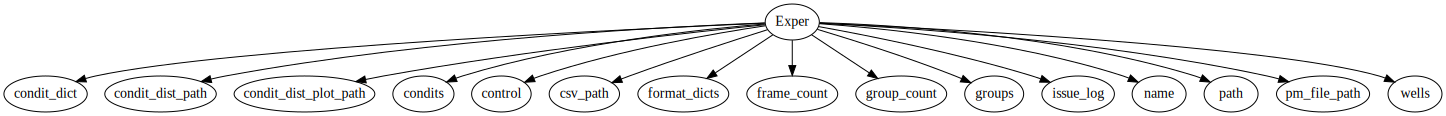

In [261]:
e

In [264]:
funcs2 = []
attrs2 = []
for x in range(len(lines3)) :
    line = lines3[x]
    i = Line.pattern_in_list(line,S2)
    if i != -1 :
        ind = i + len(S2)
        if len(line) > ind+1 and line[ind+1] == '(' :
            if line[ind] not in funcs2 :
                funcs2.append(line[ind])
        else :
            if line[ind] not in attrs2 :
                attrs2.append(line[ind])

print()
print(funcs2)
print()
print(attrs2)


['init_paths_pm', 'init_wells', 'init_condits', 'dists_to_xlsx2', 'out_plot_a', 'init_groups', 'out_meds_to_xlsx', 'out_issue_log', 'init_control', 'helper_indentify_control', 'helper_xlsx_formats']

['path', 'name', 'pm_file_path', 'csv_path', 'condit_dist_path', 'wells', 'condits', 'control', 'issue_log', 'groups', 'group_count', 'frame_count', 'condit_dict', 'condit_dist_plot_path', 'format_dicts']


In [ ]:
from IPython.core.display import display, HTML

In [267]:
s = """<dl class="attribute">
<dt id="apple_pie.Condit.exper">
<code class="descname">{}</code><em class="property"> = {}</em><a class="headerlink" href="#apple_pie.Condit.exper" title="Permalink to this definition">¶</a></dt>
<dd></dd></dl>"""
s2 = """<dl class="attribute">
<dt id="apple_pie.Condit.{0}">
<code class="descname">{0}</code></dt>
<dd><p>{1}</p>
</dd></dl>"""

#print(s.format(10,1))
for attr in attr_list :
    print()
    print(s2.format(attr,''))


<dl class="attribute">
<dt id="apple_pie.Condit.condit_dict">
<code class="descname">condit_dict</code></dt>
<dd><p></p>
</dd></dl>

<dl class="attribute">
<dt id="apple_pie.Condit.condit_dist_path">
<code class="descname">condit_dist_path</code></dt>
<dd><p></p>
</dd></dl>

<dl class="attribute">
<dt id="apple_pie.Condit.condit_dist_plot_path">
<code class="descname">condit_dist_plot_path</code></dt>
<dd><p></p>
</dd></dl>

<dl class="attribute">
<dt id="apple_pie.Condit.condits">
<code class="descname">condits</code></dt>
<dd><p></p>
</dd></dl>

<dl class="attribute">
<dt id="apple_pie.Condit.control">
<code class="descname">control</code></dt>
<dd><p></p>
</dd></dl>

<dl class="attribute">
<dt id="apple_pie.Condit.csv_path">
<code class="descname">csv_path</code></dt>
<dd><p></p>
</dd></dl>

<dl class="attribute">
<dt id="apple_pie.Condit.format_dicts">
<code class="descname">format_dicts</code></dt>
<dd><p></p>
</dd></dl>

<dl class="attribute">
<dt id="apple_pie.Condit.frame_coun

In [250]:
a = 216
b = a-2
c = a+3
# from pprint import pprint
# pprint(lines[b:c])
# pprint(lines3[b:c])
for butts in lines[b:c] : print(butts.replace('\n',''))
print()
for butts in lines3[b:c] : print(butts)
    

    def init_paths_pm(self) :
        self.pm_file_path = self.helper_find_file_easy(Exper.PLATE_MAP_SUF)
        table_types, well_dicts, self.condit_dict = Exper.in_plate_map(self.pm_file_path)

        self.csv_path = os.path.join(self.path,Exper.CSV_DIR)

['def', 'init_paths_pm', '(', 'self', ')', '', ':']
['self', '.', 'pm_file_path', '=', 'self', '.', 'helper_find_file_easy', '(', 'Exper', '.', 'PLATE_MAP_SUF', ')', '']
['table_types', ',', '', 'well_dicts', ',', '', 'self', '.', 'condit_dict', '=', 'Exper', '.', 'in_plate_map', '(', 'self', '.', 'pm_file_path', ')', '']
[]
['self', '.', 'csv_path', '=', 'os', '.', 'path', '.', 'join', '(', 'self', '.', 'path', ',', 'Exper', '.', 'CSV_DIR', ')', '']


In [251]:
t = 'asdfadsf'
w = t.split('.')
w

['asdfadsf']

In [132]:
l = [x for x in range(10)]
l[:5].extend([x for x in range(20)])
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]